In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split

from scipy import ndimage
from skimage.io import imread
from skimage import color
from skimage.transform import resize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import time
import cv2
from PIL import Image
%matplotlib inline
import scipy.misc
from sklearn.svm import SVC
from PIL import Image

from imblearn import under_sampling, over_sampling


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing

In [30]:
feat_df = pd.read_csv('data/features.csv', sep=',')

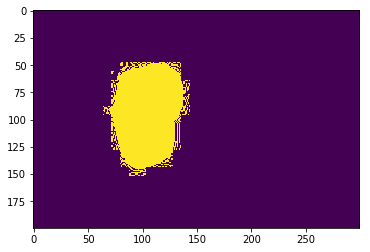

0.0


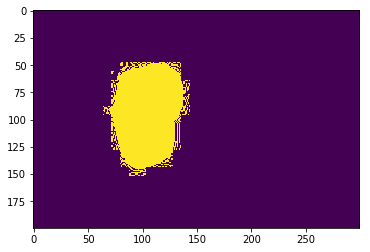

0.0


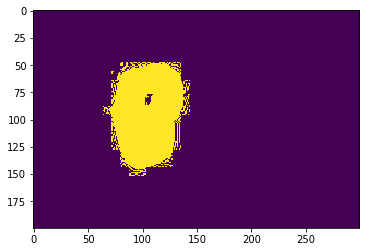

0.0923829243451


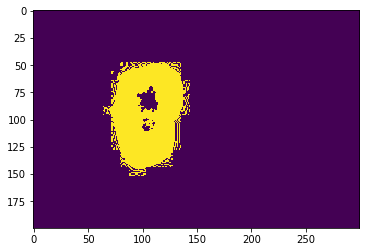

0.518507269654


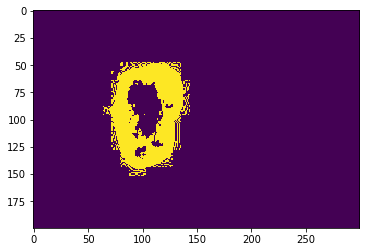

0.773981925062


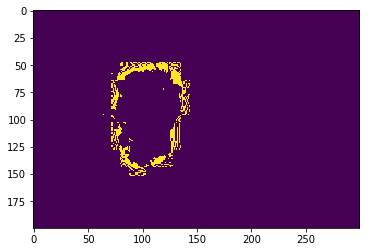

3.19512388389
0.0181349843007 0.00071392199017


In [31]:
image = imread('data/im_resized/IM_000003_resized.jpg')
image_S = imread('data/im_resized/IM_000003_Segmentation_resized.jpg')


image_S = image_S.astype(bool)
#On convertit l'image en niveau de gris
gray_image = color.rgb2gray(image)*255
n,p = gray_image.shape
    
#On calcule le centre de masse du masque de l'image.
x, y = ndimage.measurements.center_of_mass(image_S)
        
#toutes les valeurs hors de la lésion doivent être nulles
masked_im = np.array(gray_image*image_S, np.int32)
n1 = 6        
v = np.zeros(n1)
for i in range (1,n1+1):
    mask_t = np.zeros((n,p),dtype = np.uint8)
    idx = masked_im[:,:] > 255*i*0.1
    mask_t[idx] = 255
    plt.imshow(mask_t)
    plt.show()
    xt, yt = ndimage.measurements.center_of_mass(mask_t)
    v[i-1] = np.sqrt((xt-x)**2 +(yt-y)**2)
    print(v[i-1])
area = np.count_nonzero(image_S)
r = np.sqrt(area/np.pi)
v = v/r
f1 = np.mean(v)
f2 = np.var(v)
print(f1,f2)

In [32]:
feat_df = feat_df.head(900)

In [38]:
feat_df = feat_df.head(900)
def asymetry_color(idRep):
    t = time.time()
    m=0
    A = []
    B = []
    for x in idRep:
        m+=1
        filename = 'data/im_resized/{}_resized.jpg'.format(x)
        filename_S = 'data/im_resized/{}_Segmentation_resized.jpg'.format(x)
        image = imread(filename)
        image_S = imread(filename_S)
        image_S = image_S.astype(bool)
        
        #On convertit l'image en niveau de gris
        gray_image = color.rgb2gray(image)*255
        n,p = gray_image.shape
    
        #On calcule le centre de masse du masque de l'image.
        x, y = ndimage.measurements.center_of_mass(image_S)
        
        #toutes les valeurs hors de la lésion doivent être nulles
        masked_im = np.array(gray_image*image_S, np.int32)
        n1 = 6
        v = np.zeros(n1)
        for i in range (1,n1+1):
            mask_t = np.zeros((n,p),dtype = np.uint8)
            idx = masked_im[:,:] > 255*i*0.1
            mask_t[idx] = 255
            xt, yt = ndimage.measurements.center_of_mass(mask_t)
            if (np.isnan(xt)):
                xt = x
                yt = y
            v[i-1] = np.sqrt((xt-x)**2 +(yt-y)**2)
        area = np.count_nonzero(image_S)
        
        r = np.sqrt(area/np.pi)
        v = (1./r)*v
        f1 = np.mean(v)
        f2 = np.var(v)

                    
        if(m%50 ==0):
            print(time.time()-t)
            print(f1)
            print(m," : tour 1")
        feat_df.loc[feat_df['ImageId'] == x, 'color_Asm1'] = 255*f1
        A.append(255*f1)
        feat_df.loc[feat_df['ImageId'] == x, 'color_Asm2'] = 255*f2
        B.append(255*f2)
    print(time.time()-t)
    #feat_df.to_csv('data/features1.csv', index=None, sep=',', mode='w')
    return(A,B)
A,B = asymetry_color(feat_df['ImageId'].values)

/Users/raphael/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1301: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


1.0217111110687256
0.0271742389512
50  : tour 1
1.96364426612854
0.0448996810986
100  : tour 1
2.92729115486145
0.0102552083222
150  : tour 1
3.8852152824401855
0.0376681468036
200  : tour 1
4.967572212219238
0.00315013079047
250  : tour 1
6.009399175643921
0.0143656156417
300  : tour 1
7.168903350830078
0.068161204202
350  : tour 1
8.187654256820679
0.00324341035304
400  : tour 1
9.149314165115356
0.0116442946312
450  : tour 1
10.206698417663574
0.0976447124767
500  : tour 1
11.234517335891724
0.0247448933228
550  : tour 1
12.151227235794067
0.0522048829602
600  : tour 1
13.173601150512695
0.0505254119469
650  : tour 1
14.27624225616455
0.016324279416
700  : tour 1
15.33289623260498
0.00225370997314
750  : tour 1
16.29729723930359
0.0383347783629
800  : tour 1
17.306973218917847
0.0872772705251
850  : tour 1
18.31758213043213
0.01002671179
900  : tour 1
18.32835030555725


In [39]:
feat_df['color_Asm1'] = A
feat_df['color_Asm2'] = B

In [41]:
feat_df.to_csv('data/features.csv', index=None, sep=',', mode='w')

In [44]:
np.isnan(np.min(A))

False